In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
accident = pd.read_csv('data/자전거사고다발지역정보.csv', encoding = 'CP949')
accident.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [3]:
accident.shape

(2718, 15)

In [4]:
accident_seoul = accident.loc[accident['시도시군구명'].str.contains('서울특별시')]
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [5]:
accident_seoul.shape

(1018, 15)

In [6]:
accident_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  1018 non-null   object 
 1   사고다발지ID   1018 non-null   int64  
 2   법정동코드     1018 non-null   int64  
 3   지점코드      1018 non-null   int64  
 4   시도시군구명    1018 non-null   object 
 5   지점명       1018 non-null   object 
 6   발생건수      1018 non-null   int64  
 7   사상자수      1018 non-null   int64  
 8   사망자수      1018 non-null   int64  
 9   중상자수      1018 non-null   int64  
 10  경상자수      1018 non-null   int64  
 11  부상신고자수    1018 non-null   int64  
 12  경도        1018 non-null   float64
 13  위도        1018 non-null   float64
 14  다발지역폴리곤   1018 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 127.2+ KB


In [7]:
accident_seoul=accident_seoul.dropna(subset=['위도'])
accident_seoul=accident_seoul.dropna(subset=['경도'])
accident_seoul.shape

(1018, 15)

In [8]:
accident_map = folium.Map(location=[accident_seoul['위도'].mean(), accident_seoul['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
for i, row in accident_seoul.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        fill=True,
    ).add_to(accident_map)
accident_map

In [9]:
accident_map = folium.Map(location=[accident_seoul['위도'].mean(), accident_seoul['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
plugins.HeatMap(accident_seoul[['위도', '경도']].values.tolist(), radius=10, blur=5).add_to(accident_map)
plugins.Fullscreen(positions='topright').add_to(accident_map)
accident_map

In [10]:
accident_seoul['지역구']=accident['지점명'].str.split(" ").str[1]
accident_seoul=accident_seoul.drop(['다발지역폴리곤'], axis='columns')
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역구
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,종로구
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,종로구
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,종로구
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,중구
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,용산구


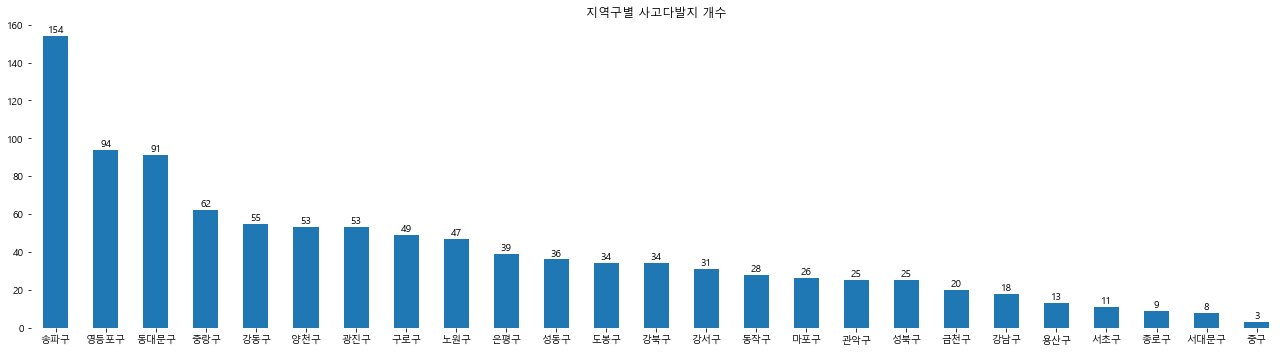

In [11]:
accident_seoul_gu = accident_seoul.groupby('지역구').size()
accident_seoul_gu.sort_values(ascending=False, inplace=True)

ax = accident_seoul_gu.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [12]:
rental = pd.read_csv('data/서울특별시 공공자전거 대여소 정보.csv')
rental.head()

,대여소_구,대여소ID,대여소명,대여소주소,위도,경도,기준시작일자,거치대수
0,마포구,101.0,101. (구)합정동 주민센터,서울특별시 마포구 동교로8길 58,37.549561,126.905754,2015-09-06 23:40,5.0
1,마포구,102.0,102. 망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06 23:42,20.0
2,마포구,103.0,103. 망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06 23:43,14.0
3,마포구,104.0,104. 합정역 1번출구 앞,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06 23:44,13.0
4,마포구,105.0,105. 합정역 5번출구 앞,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06 23:45,5.0


In [13]:
rental=rental.dropna(subset=['위도'])
rental=rental.dropna(subset=['경도'])
rental.shape

(1540, 8)

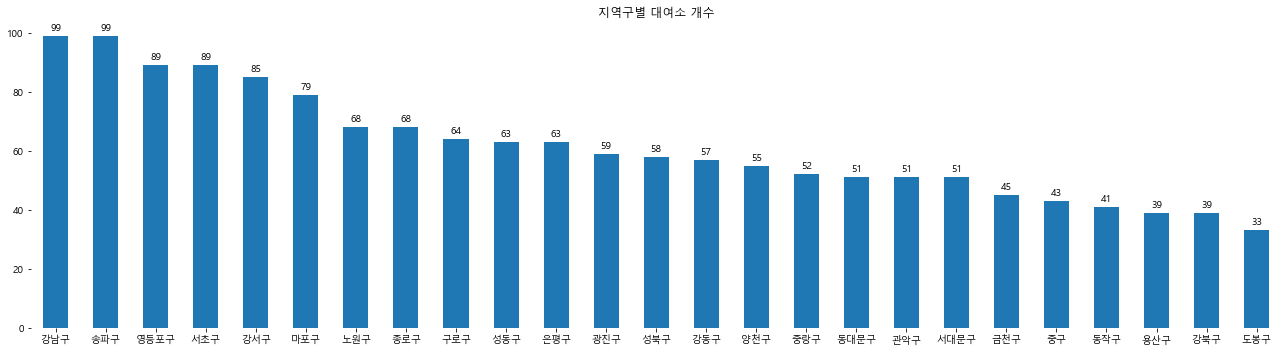

In [14]:
have_bikes = rental.groupby('대여소_구').size()
have_bikes.sort_values(ascending=False, inplace=True)

ax = have_bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 대여소 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [15]:
have_bikes

대여소_구
강남구     99
송파구     99
영등포구    89
서초구     89
강서구     85
마포구     79
노원구     68
종로구     68
구로구     64
성동구     63
은평구     63
광진구     59
성북구     58
강동구     57
양천구     55
중랑구     52
동대문구    51
관악구     51
서대문구    51
금천구     45
중구      43
동작구     41
용산구     39
강북구     39
도봉구     33
dtype: int64

In [16]:
accident_seoul_gu

지역구
송파구     154
영등포구     94
동대문구     91
중랑구      62
강동구      55
양천구      53
광진구      53
구로구      49
노원구      47
은평구      39
성동구      36
도봉구      34
강북구      34
강서구      31
동작구      28
마포구      26
관악구      25
성북구      25
금천구      20
강남구      18
용산구      13
서초구      11
종로구       9
서대문구      8
중구        3
dtype: int64

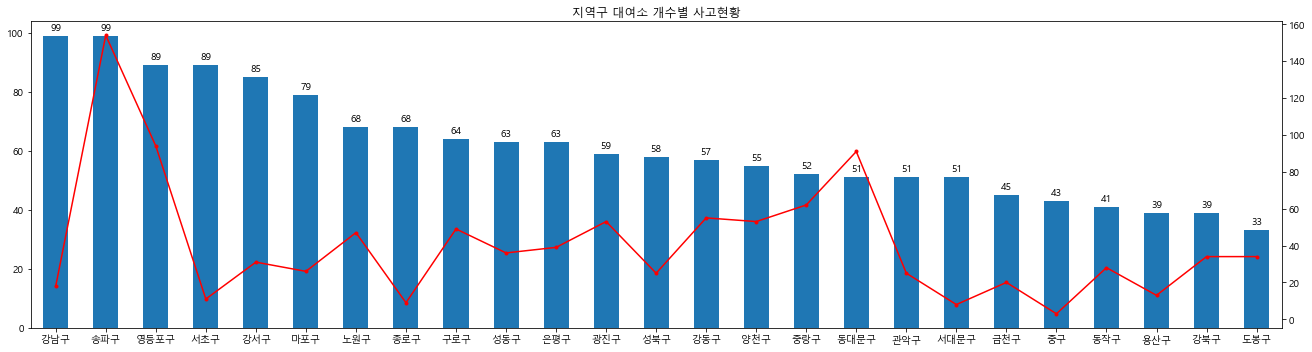

In [23]:
have_bikes = rental.groupby('대여소_구').size()
have_bikes.sort_values(ascending=False, inplace=True)

ax = have_bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구 대여소 개수별 사고현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')

plt.box(False)
plt.xlabel('')
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(df3_columns ,'r.-')
plt.show()

In [24]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    m = 1000 * km
    return m

In [25]:
distance_gu = {}
for gu, df in rental.groupby('대여소_구'):
    distance_list = []
    for i, i_row in df.iterrows():
        min_dist = float('INF')
        for j, j_row in df.iterrows():
            if i == j:
                continue
            d = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
            min_dist = d if d < min_dist else min_dist
            
        distance_list.append(min_dist)
    distance_gu[gu] = distance_list

In [26]:
distance_gu.items()

dict_items([('강남구', [648.4778278906048, 704.7472402575354, 685.7153235814396, 254.60732456420965, 236.10375240599265, 50.86071338037918, 271.96937124618546, 271.96937124618546, 130.93904608323766, 153.9942886881273, 248.88468046585837, 96.16173155997932, 608.5559577661594, 411.489447864134, 483.8222846269406, 109.29545561923368, 483.8222846269406, 467.03843593393515, 204.0082300382591, 565.5924010703615, 501.74159872507227, 134.24736926646725, 215.5141245903892, 215.5141245903892, 419.0448638407787, 419.0448638407787, 179.5607773110077, 144.98601380954014, 58.57402528928541, 183.28817468191363, 462.3828928901453, 345.0620820540274, 642.4425379986607, 147.82539093490792, 395.0856852081075, 76.07781749087899, 108.42742116490578, 252.87142908105264, 505.59821454127285, 366.28434659914166, 611.6629434859514, 577.1153083923407, 574.3623791625428, 121.19367746718324, 204.0082300382591, 373.4783587055429, 76.07781749087899, 366.28434659914166, 121.19367746718324, 248.88468046585837, 96.161731

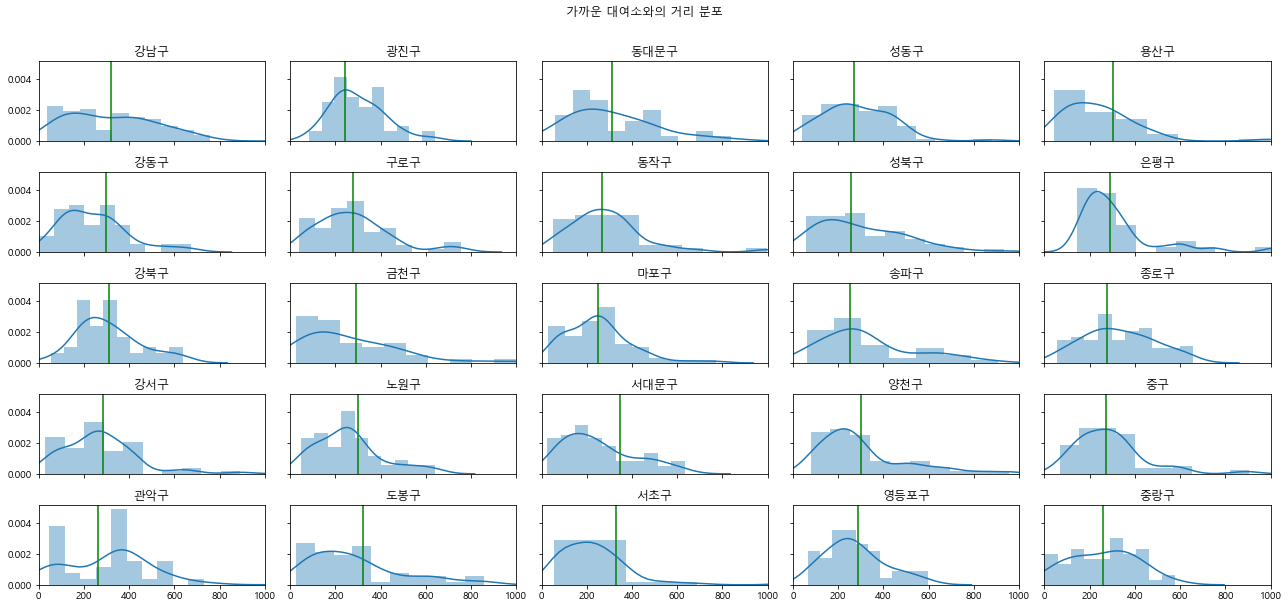

In [27]:
fig, axes = plt.subplots(5, 5, figsize=(18, 8), sharex=True, sharey=True)

i, j = 0, 0
for gu, distance_list in distance_gu.items():
    sns.distplot(distance_list, ax=axes[i][j], bins=10)
    axes[j][i].set_title(gu)
    axes[j][i].axvline(np.array(distance_list).mean(), color='green')
    j += 1
    if j >= 5:
        i += 1
        j = 0

fig.suptitle("가까운 대여소와의 거리 분포", y=1.05)
plt.xlim(0, 1000)
fig.tight_layout()
plt.show()

In [28]:
accident_dist_gu = {}
for gu, df in accident_seoul.groupby('지역구'):
    accident_dist_list = []
    for i, i_row in df.iterrows():
        accident_min_dist = float('INF')
        for j, j_row in df.iterrows():
            if i == j:
                continue
            accident_d = haversine(i_row['경도'], i_row['위도'], j_row['경도'], j_row['위도'])
            accident_min_dist = accident_d if accident_d < accident_min_dist else accident_min_dist
            
        accident_dist_list.append(accident_min_dist)
    accident_dist_gu[gu] = accident_dist_list

In [29]:
accident_dist_gu.items()

dict_items([('강남구', [2786.296218357387, 402.56983038817447, 1566.7097525951015, 66.07019398144288, 881.2804666964594, 402.56983038817447, 374.9219212019306, 243.9095806658251, 588.5958993483916, 187.70565509151322, 881.2804666964594, 591.5313990960326, 591.5313990960326, 884.2884096034832, 1113.7180200711698, 187.70565509151322, 66.07019398144288, 243.9095806658251]), ('강동구', [93.33624419455376, 154.95849434654147, 351.91993979156575, 113.91097771420228, 146.7906207742311, 19.15486078730134, 92.07870811844666, 84.52267688899352, 344.6338926139289, 74.99812004572547, 27.313557788973444, 56.79328989896733, 66.4348709272549, 31.161140594652036, 92.07870811844666, 440.8108065890199, 535.2144813552392, 456.47231547163494, 96.83984261005082, 84.52267688899352, 104.19513550305295, 19.968165785650537, 145.6637091604196, 406.777383731649, 20.530041831545898, 66.4348709272549, 27.313557788973444, 456.4444996633093, 457.6623975214037, 154.95849434654147, 351.91993979156575, 21.265234601291464, 14

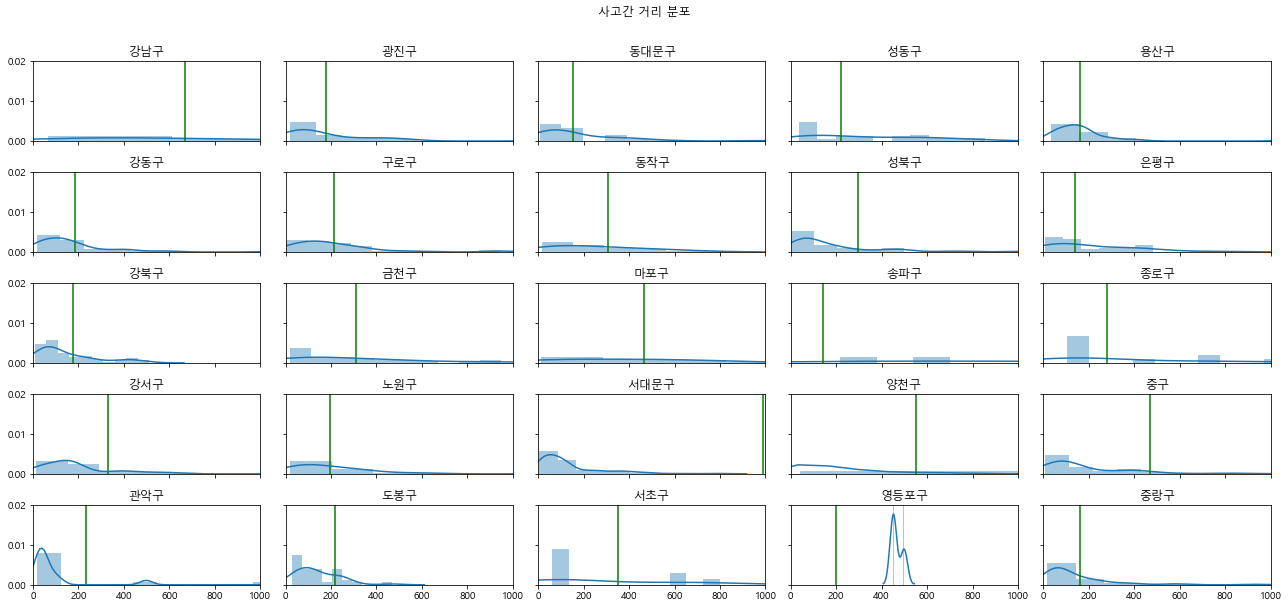

In [30]:
fig, axes = plt.subplots(5, 5, figsize=(18, 8), sharex=True, sharey=True)

i, j = 0, 0
for gu, accident_dist_list in accident_dist_gu.items():
    sns.distplot(accident_dist_list, ax=axes[i][j], bins=10)
    axes[j][i].set_title(gu)
    axes[j][i].axvline(np.array(accident_dist_list).mean(), color='green')
    j += 1
    if j >= 5:
        i += 1
        j = 0

fig.suptitle("사고간 거리 분포", y=1.05)
plt.xlim(0, 1000)
plt.ylim(0, 0.02)
fig.tight_layout()
plt.show()

In [31]:
distance_means = {gu: np.mean(distance_list) for gu, distance_list in distance_gu.items() }
distance_means = pd.Series(distance_means)
distance_means.sort_values(inplace=True)

distance_means

광진구     244.595729
마포구     249.004180
송파구     252.241342
성북구     257.890745
중랑구     259.565812
관악구     263.209558
동작구     266.937932
성동구     270.340348
중구      272.904307
종로구     276.418481
구로구     279.134097
강서구     282.685137
영등포구    288.472792
은평구     289.008319
금천구     289.457561
강동구     299.037678
노원구     301.018164
양천구     302.398903
용산구     304.771790
동대문구    310.080729
강북구     312.422884
강남구     320.073554
도봉구     321.331211
서초구     329.861767
서대문구    348.434084
dtype: float64

In [32]:
accident_dist_means = {gu: np.mean(accident_dist_list) for gu, accident_dist_list in accident_dist_gu.items() }
accident_dist_means = pd.Series(accident_dist_means)
accident_dist_means.sort_values(inplace=True)

accident_dist_means

은평구     139.761749
송파구     140.499087
동대문구    153.256482
용산구     161.247127
중랑구     162.296542
강북구     178.192707
광진구     179.504975
강동구     185.679682
노원구     195.006024
영등포구    197.556756
구로구     214.149977
도봉구     217.270756
성동구     223.341653
관악구     232.761950
종로구     281.641581
성북구     296.944878
동작구     305.983219
금천구     310.668453
강서구     329.813961
서초구     351.507203
마포구     466.900546
중구      467.479997
양천구     553.040660
강남구     670.036915
서대문구    990.136365
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression


In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.DataFrame(have_bikes)
df1

df2 = pd.DataFrame(accident_seoul_gu)
df2

df3 = pd.concat([df1, df2], axis=1)
df3

,0,0
강남구,99,18
송파구,99,154
영등포구,89,94
서초구,89,11
강서구,85,31
마포구,79,26
노원구,68,47
종로구,68,9
구로구,64,49
성동구,63,36


In [19]:
df3.columns = ['대여소개수', '사고건수']
df3

,대여소개수,사고건수
강남구,99,18
송파구,99,154
영등포구,89,94
서초구,89,11
강서구,85,31
마포구,79,26
노원구,68,47
종로구,68,9
구로구,64,49
성동구,63,36


In [20]:
df3_columns = df3[['사고건수']]
df3_columns

,사고건수
강남구,18
송파구,154
영등포구,94
서초구,11
강서구,31
마포구,26
노원구,47
종로구,9
구로구,49
성동구,36


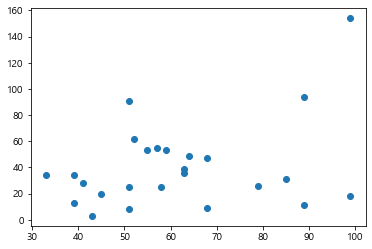

In [21]:
X = df3["대여소개수"]
y = df3["사고건수"]
plt.plot(X, y, 'o')
plt.show()

In [22]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

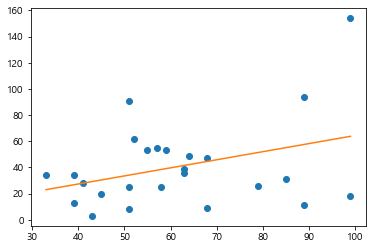

In [33]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

In [34]:
import scipy.stats as stats

corr = stats.pearsonr(X, y)
corr

(0.35255999703825314, 0.08388910295539001)

In [35]:
corr1 = stats.pearsonr(y, X)
corr1

(0.35255999703825314, 0.08388910295539001)